In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import os

import warnings

In [3]:
data = pd.read_csv('C:/Users/Миша/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2/Reviews.csv')
display(data.head(20))
display(data.info)

df = data.copy()
df = df[:10000]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [4]:
df = df['Text']

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 3.2 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 5.4 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 5.2 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 5.2 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 5.2 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 3.9 MB/s eta 0:00:02
     --------------------------- ------------ 8.9/12.8 MB 5.4 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 5.0 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 5.0 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 5.4 MB/

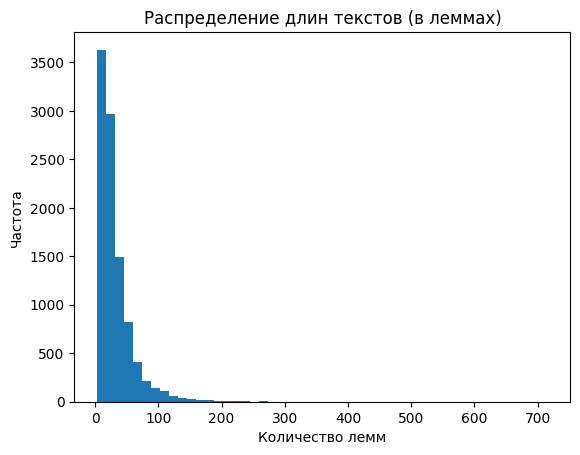


1
Оригинал: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The produc ...
Очищенный: i have bought several of the vitality canned dog food products and have found them all to be of good quality the product ...
Леммы: ['buy', 'vitality', 'dog', 'food', 'product', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'labrador', 'finicky', 'appreciate', 'product']
Длина: 19

2
Оригинал: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was a ...
Очищенный: product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an e ...
Леммы: ['product', 'arrive', 'label', 'jumbo', 'salt', 'peanut', 'peanut', 'actually', 'small', 'sized', 'unsalte', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo']
Длина: 18

3
Оригинал: This is a confection that has been around 

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import emoji
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

class TextPreprocessor:
    def __init__(self):
        self.stopwords = nlp.Defaults.stop_words

    def clean_text(self, text: str) -> str:
        text = str(text)

        # удаление HTML
        text = BeautifulSoup(text, "html.parser").get_text()

        # lower
        text = text.lower()

        # удаление эмодзи
        text = emoji.replace_emoji(text, replace="")

        # удаление всего кроме букв
        text = re.sub(r"[^a-z\s]", " ", text)

        # нормализация пробелов
        text = re.sub(r"\s+", " ", text).strip()

        return text

    def lemmatize(self, text: str):
        doc = nlp(text)
        lemmas = [
            token.lemma_
            for token in doc
            if token.lemma_ not in self.stopwords
            and len(token.lemma_) > 2
        ]
        return lemmas

    def preprocess(self, text: str):
        cleaned = self.clean_text(text)
        lemmas = self.lemmatize(cleaned)
        return lemmas

    def analyze_text_lengths(self, texts):
        lengths = []

        for text in texts:
            lemmas = self.preprocess(text)
            lengths.append(len(lemmas))

        print(f"Средняя длина: {np.mean(lengths):.1f}")
        print(f"Медиана: {np.median(lengths):.1f}")
        print(f"Максимальная: {np.max(lengths)}")
        print(f"Минимальная: {np.min(lengths)}")

        plt.hist(lengths, bins=50)
        plt.title("Распределение длин текстов (в леммах)")
        plt.xlabel("Количество лемм")
        plt.ylabel("Частота")
        plt.show()

        return lengths

    def debug_samples(self, texts, n_samples=5):
        for i in range(min(n_samples, len(texts))):
            print(f"\n{i+1}")
            print("Оригинал:", texts[i][:120], "...")
            cleaned = self.clean_text(texts[i])
            print("Очищенный:", cleaned[:120], "...")
            lemmas = self.lemmatize(cleaned)
            print("Леммы:", lemmas[:20])
            print("Длина:", len(lemmas))


preprocessor = TextPreprocessor()

all_texts = df.tolist()

lengths = preprocessor.analyze_text_lengths(all_texts)
preprocessor.debug_samples(all_texts, n_samples=10)

In [13]:
!pip install sentence-transformers torch

# ============ Кодирование текстов ============

# Метод 1: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Создаем тексты для кодирования (объединяем леммы в строки)
def get_processed_texts(texts):
    """Преобразует тексты в обработанные строки"""
    processed_texts = []
    for text in texts:
        lemmas = preprocessor.preprocess(text)
        processed_texts.append(' '.join(lemmas))
    return processed_texts

print("\n" + "="*50)
print("Кодирование текстов с помощью TF-IDF")
print("="*50)

# Получаем обработанные тексты
processed_texts = get_processed_texts(all_texts)

# Создаем TF-IDF векторизатор
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # ограничиваем количество признаков
    min_df=2,  # слово должно встречаться минимум в 2 документах
    max_df=0.85,  # игнорируем слова, встречающиеся в более чем 85% документов
    ngram_range=(1, 2)  # учитываем униграммы и биграммы
)

# Обучаем TF-IDF и преобразуем тексты
tfidf_embeddings = tfidf_vectorizer.fit_transform(processed_texts)

print(f"Размерность TF-IDF матрицы: {tfidf_embeddings.shape}")
print(f"Количество признаков: {len(tfidf_vectorizer.get_feature_names_out())}")

# Пример получения наиболее важных слов
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nПервые 20 признаков (слов): {feature_names[:20]}")

# Сохраняем результаты
tfidf_df = pd.DataFrame(
    tfidf_embeddings.toarray(),
    columns=[f"tfidf_{i}" for i in range(tfidf_embeddings.shape[1])]
)
print(f"\nTF-IDF DataFrame создан, размер: {tfidf_df.shape}")

# Метод 2: SBERT (Sentence-BERT)
print("\n" + "="*50)
print("Кодирование текстов с помощью SBERT")
print("="*50)

try:
    from sentence_transformers import SentenceTransformer
    import torch
    
    # Проверяем наличие GPU
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Используемое устройство: {device}")
    
    # Загружаем предобученную модель SBERT
    print("Загрузка модели SBERT...")
    sbert_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)
    
    # Для SBERT используем очищенные тексты (но не токенизированные)
    def get_cleaned_texts(texts):
        """Получаем очищенные тексты для SBERT"""
        cleaned_texts = []
        for text in texts:
            cleaned = preprocessor.clean_text(text)
            cleaned_texts.append(cleaned)
        return cleaned_texts
    
    # Получаем очищенные тексты
    cleaned_texts = get_cleaned_texts(all_texts)
    
    # Кодируем тексты с помощью SBERT
    print("Кодирование текстов SBERT...")
    sbert_embeddings = sbert_model.encode(
        cleaned_texts,
        batch_size=32,
        show_progress_bar=True,
        convert_to_tensor=True,
        normalize_embeddings=True  # нормализуем векторы
    )
    
    # Преобразуем в numpy если нужно
    if isinstance(sbert_embeddings, torch.Tensor):
        sbert_embeddings = sbert_embeddings.cpu().numpy()
    
    print(f"Размерность SBERT эмбеддингов: {sbert_embeddings.shape}")
    print(f"Размер одного эмбеддинга: {sbert_embeddings.shape[1]} измерений")
    
    # Сохраняем результаты
    sbert_columns = [f"sbert_{i}" for i in range(sbert_embeddings.shape[1])]
    sbert_df = pd.DataFrame(sbert_embeddings, columns=sbert_columns)
    print(f"SBERT DataFrame создан, размер: {sbert_df.shape}")
    
    # Пример сравнения схожести текстов
    print("\nПример вычисления схожести текстов:")
    from sklearn.metrics.pairwise import cosine_similarity
    
    # Берем первые 3 текста для примера
    sample_embeddings = sbert_embeddings[:3]
    similarities = cosine_similarity(sample_embeddings)
    
    print("Матрица косинусной схожести для первых 3 текстов:")
    print(similarities)
    
except ImportError as e:
    print(f"Ошибка импорта: {e}")
    print("Установите необходимые библиотеки:")
    print("pip install sentence-transformers torch")
except Exception as e:
    print(f"Ошибка при работе с SBERT: {e}")

# Объединяем все эмбеддинги в один DataFrame
print("\n" + "="*50)
print("Итоговые результаты")
print("="*50)

# Создаем DataFrame с исходными текстами
results_df = pd.DataFrame({
    'original_text': all_texts[:len(processed_texts)],
    'processed_text': processed_texts
})

# Объединяем с TF-IDF эмбеддингами
results_df = pd.concat([results_df, tfidf_df], axis=1)

# Объединяем с SBERT эмбеддингами если они есть
if 'sbert_df' in locals():
    results_df = pd.concat([results_df, sbert_df], axis=1)

print(f"Итоговый DataFrame размер: {results_df.shape}")
print(f"Колонки: {list(results_df.columns)[:10]}...")  # Показываем первые 10 колонок

# Сохранение результатов
try:
    # Сохраняем TF-IDF вектора
    tfidf_df.to_csv('tfidf_embeddings.csv', index=False)
    print("\nTF-IDF эмбеддинги сохранены в 'tfidf_embeddings.csv'")
    
    # Сохраняем SBERT вектора если они есть
    if 'sbert_df' in locals():
        sbert_df.to_csv('sbert_embeddings.csv', index=False)
        print("SBERT эмбеддинги сохранены в 'sbert_embeddings.csv'")
    
    # Сохраняем объединенный DataFrame
    results_df.to_csv('all_embeddings.csv', index=False)
    print("Все эмбеддинги сохранены в 'all_embeddings.csv'")
    
except Exception as e:
    print(f"Ошибка при сохранении: {e}")

# Анализ полученных эмбеддингов
print("\n" + "="*50)
print("Анализ эмбеддингов")
print("="*50)

# Для TF-IDF
print("\nTF-IDF анализ:")
print(f"Плотность матрицы (ненулевые элементы): {(tfidf_embeddings.nnz / (tfidf_embeddings.shape[0] * tfidf_embeddings.shape[1]) * 100):.2f}%")
print(f"Среднее значение ненулевых элементов: {tfidf_embeddings.data.mean():.4f}")

# Для SBERT
if 'sbert_embeddings' in locals():
    print("\nSBERT анализ:")
    print(f"Среднее значение эмбеддингов: {sbert_embeddings.mean():.6f}")
    print(f"Стандартное отклонение: {sbert_embeddings.std():.6f}")
    print(f"Минимальное значение: {sbert_embeddings.min():.6f}")
    print(f"Максимальное значение: {sbert_embeddings.max():.6f}")

# Визуализация (опционально)
try:
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    
    # Визуализируем SBERT эмбеддинги в 2D
    print("\nВизуализация SBERT эмбеддингов...")
    
    # Берем подвыборку для визуализации
    n_samples = min(500, len(sbert_embeddings))
    sample_embeddings = sbert_embeddings[:n_samples]
    
    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(sample_embeddings)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=20)
    plt.title('Визуализация SBERT эмбеддингов (PCA до 2D)')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.2%}")
    
except Exception as e:
    print(f"Ошибка при визуализации: {e}")

print("\n" + "="*50)
print("Кодирование завершено!")
print("="*50)


Кодирование текстов с помощью TF-IDF
Размерность TF-IDF матрицы: (10000, 5000)
Количество признаков: 5000

Первые 20 признаков (слов): ['ability' 'able' 'able buy' 'able eat' 'able find' 'able use' 'absolute'
 'absolute favorite' 'absolute good' 'absolutely' 'absolutely delicious'
 'absolutely love' 'absorb' 'acacia' 'acai' 'accept' 'acceptable'
 'accident' 'accidentally' 'accord']

TF-IDF DataFrame создан, размер: (10000, 5000)

Кодирование текстов с помощью SBERT
Ошибка импорта: Traceback (most recent call last):
  File "F:\Politex\ML\venv\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Произошел сбой в программе инициализации библиотеки динамической компоновки (DLL).


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, 